## Alex's Project


## Pt 1
 - unpack the data and establish what we're working with
 - develop a plan for creating the baseline model
 - prepare data for baseline model
 - create baseline model
 - test baseline model
 

### Unpack the data and establish what we're working with

In [2]:
#Data analysis imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#ignore pairplot and graph warnings
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy import stats

In [3]:
!ls data

column_names.md           kc_house_data.csv         kc_house_data_cleaned.csv


In [4]:
#Read cleaned housing data into Pandas data frame
df = pd.read_csv("data/kc_house_data_cleaned.csv")

In [5]:
#investigate first 5 rows
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_basement2
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,...,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650,False,0
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,True,400
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,...,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062,False,0
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,...,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000,False,910
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,...,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503,False,0


In [6]:
#Look at column data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      21597 non-null  int64  
 1   id              21597 non-null  int64  
 2   date            21597 non-null  object 
 3   price           21597 non-null  float64
 4   bedrooms        21597 non-null  int64  
 5   bathrooms       21597 non-null  float64
 6   sqft_living     21597 non-null  int64  
 7   sqft_lot        21597 non-null  int64  
 8   floors          21597 non-null  float64
 9   waterfront      21597 non-null  object 
 10  view            21597 non-null  object 
 11  condition       21597 non-null  object 
 12  grade           21597 non-null  object 
 13  sqft_above      21597 non-null  int64  
 14  sqft_basement   21597 non-null  object 
 15  yr_built        21597 non-null  int64  
 16  yr_renovated    21597 non-null  float64
 17  zipcode         21597 non-null 

In [7]:
#count non-unqiue entries in the ID column
#represents homes that appear multiple times in our data
df['id'].duplicated().value_counts()

False    21420
True       177
Name: id, dtype: int64

In [8]:
#Finding list of duplicate ID values
df_dupes = df
df_dupes["dup_id"] = df_dupes['id'].duplicated()
df_dupes[df_dupes["dup_id"]==True]['id']

94       6021501535
314      4139480200
325      7520000520
346      3969300030
372      2231500030
            ...    
20165    7853400250
20597    2724049222
20654    8564860270
20764    6300000226
21565    7853420110
Name: id, Length: 177, dtype: int64

In [9]:
duplicate_id_values = list(df_dupes[df_dupes["dup_id"]==True]['id'].values)

In [10]:
#Ivestigating a few duplicate values
df[df['id']==duplicate_id_values[2]]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_basement2,dup_id
324,324,7520000520,9/5/2014,232000.0,2,1.0,1240,12092,1.0,NO,...,1922,1984.0,98146,47.4957,-122.352,1820,7460,True,280,False
325,325,7520000520,3/11/2015,240500.0,2,1.0,1240,12092,1.0,NO,...,1922,1984.0,98146,47.4957,-122.352,1820,7460,True,280,True


In [11]:
df[df['id']==duplicate_id_values[5]]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,sqft_basement2,dup_id
717,717,8820903380,7/28/2014,452000.0,6,2.25,2660,13579,2.0,NO,...,1937,1990.0,98125,47.7142,-122.286,1120,8242,True,0,False
718,718,8820903380,1/2/2015,730000.0,6,2.25,2660,13579,2.0,NO,...,1937,1990.0,98125,47.7142,-122.286,1120,8242,True,0,True


Concluding that house ids appear multiple times because homes can be sold multiple times

In [12]:
#looking at measures of central tendancy in the data
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2
count,21597.000000,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,10798.000000,4.580474e+09,5.402966e+05,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,1972.945131,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,291.725008
std,6234.661218,2.876736e+09,3.673681e+05,0.904096,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,28.945393,53.513072,0.138552,0.140724,685.230472,27274.441950,442.667800
min,0.000000,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,5399.000000,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,1954.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,0.000000
50%,10798.000000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,1977.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.000000
75%,16197.000000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,1999.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,560.000000
max,21596.000000,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,4820.000000


### Develop a plan for creating the baseline model

#### Investigate correlations of numeric columns and price
Numeric columns offer the simplest starting point for linear regression. Investigating correlation of these columns.

In [13]:
#Investigate correlations of valid numeric columns and price
valid_numeric_columns_df = df[["price","bedrooms","bathrooms","sqft_living","sqft_lot","sqft_lot","floors","sqft_above","yr_built","yr_renovated","sqft_living15"]]

In [14]:
abs(valid_numeric_columns_df.corrwith(valid_numeric_columns_df['price'])).sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.315954
floors           0.256804
yr_renovated     0.097541
sqft_lot         0.089876
sqft_lot         0.089876
yr_built         0.053953
dtype: float64

In [15]:
((abs(valid_numeric_columns_df.corr())) >= .70)[:1]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_lot,floors,sqft_above,yr_built,yr_renovated,sqft_living15
price,True,False,False,True,False,False,False,False,False,False,False


 `'sqft_living'` is a candidate for further investigation based on the absolute value of its correlations with `'price'` being above 0.70



#### Validate assumptions for simple regression 
Validate that our candidates for dependant and independant variables `'sqft_living'` and  `'price'` pass assumptions for linear regression analysis.

  ##### Before running model 
 - Linearity
 ##### After running model
 - Normality of model residals (after running model)
 - Homoscedasticity (after running model)

#### Validate linearity
The relatioinship between `'sqft_living'` and  `'price'` passes our visual linearity test. There appear to be some outliers to investigate in future models that could improve the results.

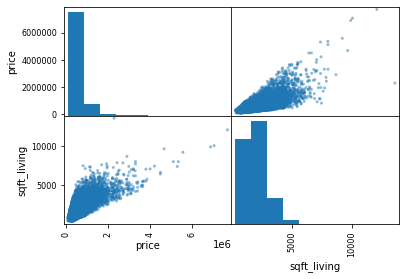

In [16]:
pd.plotting.scatter_matrix(df[['price','sqft_living']]);
plt.show()

#### Run simple regression model on `'sqft_living'` and  `'price'`

In [17]:
from statsmodels.formula.api import ols
simple_model = ols('price ~ sqft_living',df).fit()
simple_model_summary = simple_model.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:19:45   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

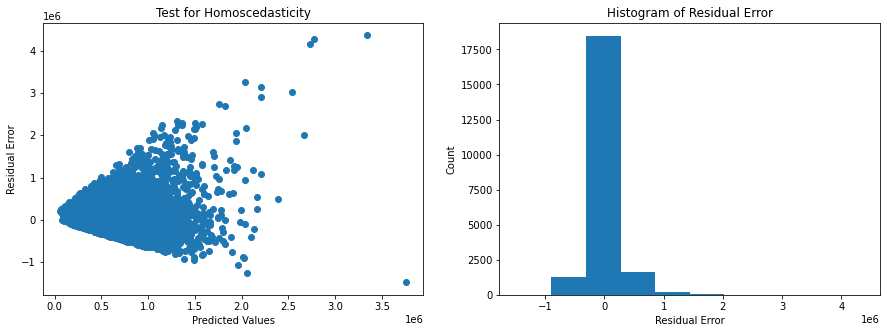

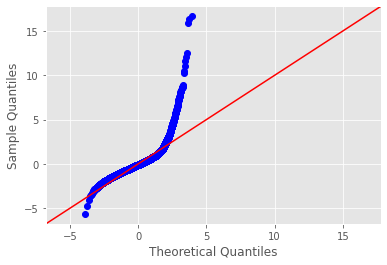

In [18]:
import scipy.stats as stats
resid = simple_model.resid

fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].scatter(x=simple_model.fittedvalues,y=resid)
ax[0].set_xlabel("Predicted Values")
ax[0].set_ylabel("Residual Error")
ax[0].set_title(label="Test for Homoscedasticity")


ax[1].hist(resid)
ax[1].set_xlabel("Residual Error")
ax[1].set_ylabel("Count")
ax[1].set_title(label="Histogram of Residual Error");

import statsmodels.api as sm
plt.style.use('ggplot')
fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)

### Analysis of simple regression model

In [19]:
print(f'R-squared {round(simple_model.rsquared,2)}')
print(f'P-Value {simple_model.f_pvalue}')
print(f'Price standard error {round(simple_model.bse,0)[0]}')
print(f'sqft_living coef {round(simple_model.params[1])}')

R-squared 0.49
P-Value 0.0
Price standard error 4410.0
sqft_living coef 281.0


We're confident that we've described a statistically significant relationship between`'sqft_living'` and  `'price'` but our model is pretty biased and doesn't do a very good job predicting home price.

Our tests of validity indicated that there is heteroscedasticity and our errors have a significant rightward skew. Our predictions seem to break down at higher `'sqft_living'` suggesting that we have some outliers to deal with to improve our model.

## Pt 2
 - Improvements to simple model

#### Validate assumptions for improvements to simple regression

 ##### Before running model 
 - Linearity
 - Outliers
 - Normality of variables (not-required) 
 ##### After running model
 - Normality of model residals (after running model)
 - Homoscedasticity (after running model)

#### Validate outliers


Looking at `'sqft_living'` because there's seems to be a lack of linearity between `'sqft_living'` and  `'price'` when `'sqft_living'` is very high

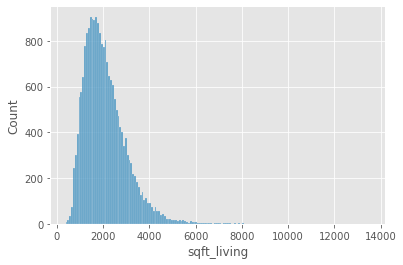

In [20]:
sns.histplot(df['sqft_living']);

In [21]:
df['sqft_living'].describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

### Model 2: Remove upper outliers in `'sqft_living'`

`'sqft_living'` is normally distributed but there is a right-skew giving us some outliers.
The rule for a high outlier is that if any data point in a dataset is more than Q3 - 1.5xIQR, it's a high outlier. We will subset our data to only look at data that falls under 1.5xIQR

In [22]:
#Find our IQR
sqft_living_iqr = df['sqft_living'].quantile(.75)-df['sqft_living'].quantile(.25)
#Find our Q3
sqft_living_Q3 = df['sqft_living'].quantile(.75)
#Multiply IQR by 1.5 to establish outlier cutoff
sqft_living_upperoutlier_cutoff = (sqft_living_iqr *3) + sqft_living_Q3
print(f' sqft_living_iqr IQR: {sqft_living_iqr}')
print(f' sqft_living_iqr upper outlier cutoff: {sqft_living_upperoutlier_cutoff}')

 sqft_living_iqr IQR: 1120.0
 sqft_living_iqr upper outlier cutoff: 5910.0


In [23]:
#Create a new df with sqft_living upper outliers removed
df_outliers_removed = df[df['sqft_living'] <= sqft_living_upperoutlier_cutoff]
print(f'We removed {len(df["sqft_living"])-len(df_outliers_removed["sqft_living"])} outliers from sqft_living')

We removed 74 outliers from sqft_living


In [24]:
refined_model_1 = ols('price ~ sqft_living',df_outliers_removed).fit()
refined_model_1_summary = refined_model_1.summary()
refined_model_1_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                 1.837e+04
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:19:46   Log-Likelihood:            -2.9782e+05
No. Observations:               21523   AIC:                         5.956e+05
Df Residuals:                   21521   BIC:                         5.957e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9633.6564   4345.922     -2.217      0.027   -1.82e+04   -1115.326
sqft_living   263.1498      1.942    135.538      0.000     259.344     266.955
==============================================================================
Omnibus:                    11403.148   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           156454.040
Skew:                           2.238   Prob(JB):                         0.00
Kurtosis:                      15.426   Cond. No.                     5.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model 2: Analysis
- We failed to improve our model
- Next, we will try to remove lower outliers in `'sqft_living'`

In [25]:
print(f'Simple R-squared {round(simple_model.rsquared,2)}')
print(f'Simple P-Value {simple_model.f_pvalue}')
print(f'Simple Price standard error {round(simple_model.bse,0)[0]}')
print(f'Simple sqft_living coef {round(simple_model.params[1])}')

print(f'refined_model_1 R-squared {round(refined_model_1.rsquared,2)}')
print(f'refined_model_1 P-Value {refined_model_1.f_pvalue}')
print(f'refined_model_1 Price standard error {round(refined_model_1.bse,0)[0]}')
print(f'refined_model_1 sqft_living coef {round(refined_model_1.params[1])}')


Simple R-squared 0.49
Simple P-Value 0.0
Simple Price standard error 4410.0
Simple sqft_living coef 281.0
refined_model_1 R-squared 0.46
refined_model_1 P-Value 0.0
refined_model_1 Price standard error 4346.0
refined_model_1 sqft_living coef 263.0


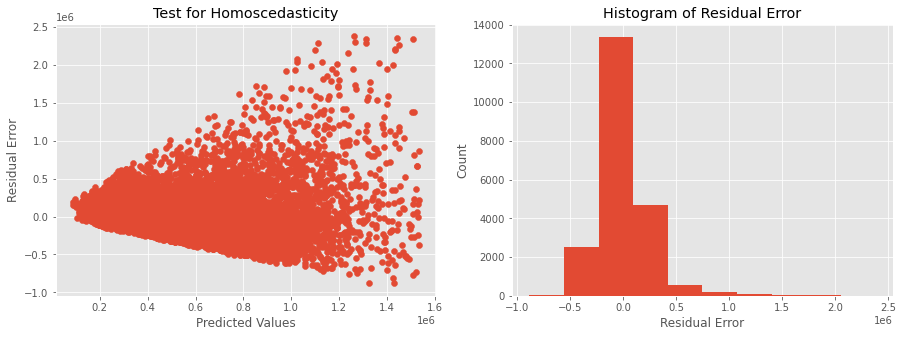

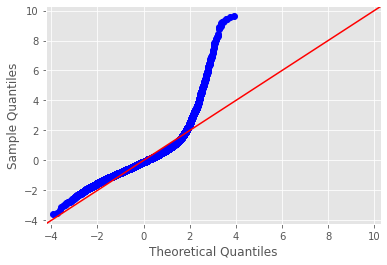

In [26]:
resid_refined_model_1 = refined_model_1.resid

fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].scatter(x=refined_model_1.fittedvalues,y=resid_refined_model_1)
ax[0].set_xlabel("Predicted Values")
ax[0].set_ylabel("Residual Error")
ax[0].set_title(label="Test for Homoscedasticity")


ax[1].hist(resid_refined_model_1)
ax[1].set_xlabel("Residual Error")
ax[1].set_ylabel("Count")
ax[1].set_title(label="Histogram of Residual Error");

import statsmodels.api as sm
plt.style.use('ggplot')
fig = sm.graphics.qqplot(resid_refined_model_1, dist=stats.norm, line='45', fit=True)

### Model 3: Remove lower outliers in `'sqft_living'`

In [27]:
#Find our IQR
sqft_living_iqr = df['sqft_living'].quantile(.75)-df['sqft_living'].quantile(.25)
#Find our Q3
sqft_living_Q3 = df['sqft_living'].quantile(.75)
#Multiply IQR by 1.5 to establish outlier cutoff
sqft_living_upperoutlier_cutoff = (sqft_living_iqr *1.5) + sqft_living_Q3
#Remove lower outliers beneath 750 sqft_living
sqft_living_loweroutlier_cutoff = 750
print(f' sqft_living_iqr IQR: {sqft_living_iqr}')
print(f' sqft_living_iqr upper outlier cutoff: {sqft_living_upperoutlier_cutoff}')
print(f' sqft_living_iqr lower outlier cutoff: {sqft_living_loweroutlier_cutoff}')

 sqft_living_iqr IQR: 1120.0
 sqft_living_iqr upper outlier cutoff: 4230.0
 sqft_living_iqr lower outlier cutoff: 750


In [28]:
#Create a new df with sqft_living lower & upper outliers removed
df_outliers_removed = df[(df['sqft_living'] <= sqft_living_upperoutlier_cutoff) & (df['sqft_living'] >= sqft_living_loweroutlier_cutoff)]
print(f'We removed {len(df["sqft_living"])-len(df_outliers_removed["sqft_living"])} outliers from sqft_living')

We removed 851 outliers from sqft_living


In [29]:
#Re-run our new model
refined_model_2 = ols('price ~ sqft_living',df_outliers_removed).fit()
refined_model_2_summary = refined_model_2.summary()
refined_model_2_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                 1.326e+04
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:19:46   Log-Likelihood:            -2.8482e+05
No. Observations:               20746   AIC:                         5.697e+05
Df Residuals:                   20744   BIC:                         5.697e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.094e+04   4381.935      9.343      0.000    3.23e+04    4.95e+04
sqft_living   234.1656      2.033    115.166      0.000     230.180     238.151
==============================================================================
Omnibus:                     9334.925   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86290.718
Skew:                           1.935   Prob(JB):                         0.00
Kurtosis:                      12.211   Cond. No.                     6.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model 3: Analysis
- We failed to improve our model
- Next, we will try to add additional variables

In [30]:
print(f'Simple R-squared {round(simple_model.rsquared,2)}')
print(f'Simple P-Value {simple_model.f_pvalue}')
print(f'Simple Price standard error {round(simple_model.bse,0)[0]}')
print(f'Simple sqft_living coef {round(simple_model.params[1])}')

print(f'refined_model_1 R-squared {round(refined_model_1.rsquared,2)}')
print(f'refined_model_1 P-Value {refined_model_1.f_pvalue}')
print(f'refined_model_1 Price standard error {round(refined_model_1.bse,0)[0]}')
print(f'refined_model_1 sqft_living coef {round(refined_model_1.params[1])}')

print(f'refined_model_2 R-squared {round(refined_model_2.rsquared,2)}')
print(f'refined_model_2 P-Value {refined_model_2.f_pvalue}')
print(f'refined_model_2 Price standard error {round(refined_model_2.bse,0)[0]}')
print(f'refined_model_2 sqft_living coef {round(refined_model_2.params[1])}')

Simple R-squared 0.49
Simple P-Value 0.0
Simple Price standard error 4410.0
Simple sqft_living coef 281.0
refined_model_1 R-squared 0.46
refined_model_1 P-Value 0.0
refined_model_1 Price standard error 4346.0
refined_model_1 sqft_living coef 263.0
refined_model_2 R-squared 0.39
refined_model_2 P-Value 0.0
refined_model_2 Price standard error 4382.0
refined_model_2 sqft_living coef 234.0


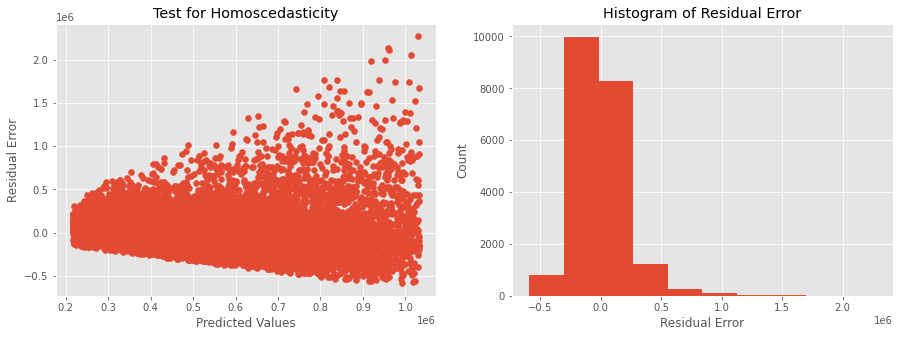

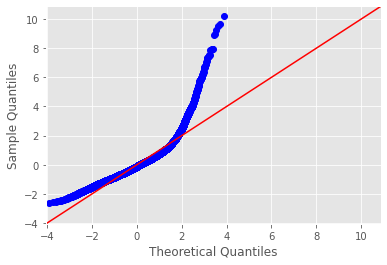

In [31]:
resid_refined_model_2 = refined_model_2.resid

fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].scatter(x=refined_model_2.fittedvalues,y=resid_refined_model_2)
ax[0].set_xlabel("Predicted Values")
ax[0].set_ylabel("Residual Error")
ax[0].set_title(label="Test for Homoscedasticity")


ax[1].hist(resid_refined_model_2)
ax[1].set_xlabel("Residual Error")
ax[1].set_ylabel("Count")
ax[1].set_title(label="Histogram of Residual Error");

import statsmodels.api as sm
plt.style.use('ggplot')
fig = sm.graphics.qqplot(resid_refined_model_2, dist=stats.norm, line='45', fit=True)

### Model 4: Multi-variable linear regressions 1


In [70]:
#Create a list of our numeric columns
df_numeric = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement2','yr_built','yr_renovated','sqft_living15','sqft_lot15']]

In [67]:
#Test up train-test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Subset to numeric columns
X_train_numeric = X_train[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement2','yr_built','yr_renovated','sqft_living15','sqft_lot15']]
X_test_numeric = X_test[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement2','yr_built','yr_renovated','sqft_living15','sqft_lot15']]

#Fit model
lr = LinearRegression()
lr.fit(X_train_numeric,y_train)

LinearRegression()

In [45]:
#Run multi-variable model using numeric columns
endog = df_numeric['price']
exog = sm.add_constant(df_numeric.drop(columns=['price']))

multi_model_1 = sm.OLS(endog, exog).fit()
multi_model_1_summary = multi_model_1.summary()
multi_model_1_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     2877.
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:32:04   Log-Likelihood:            -2.9824e+05
No. Observations:               21597   AIC:                         5.965e+05
Df Residuals:                   21586   BIC:                         5.966e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6.749e+06   1.42e+05     47.407      0.000    6.47e+06    7.03e+06
bedrooms        -7.17e+04   2312.793    -31.000      0.000   -7.62e+04   -6.72e+04
bathrooms       6.939e+04   3885.938     17.858      0.000    6.18e+04     7.7e+04
sqft_living      170.8617      2.534     67.429      0.000     165.895     175.828
sqft_lot           0.0171      0.057      0.300      0.764      -0.095       0.129
floors          5.762e+04   4165.444     13.833      0.000    4.95e+04    6.58e+04
sqft_above        80.2730      2.512     31.953      0.000      75.349      85.197
sqft_basement2    90.5884      3.022     29.980      0.000      84.666      96.511
yr_built       -4060.0177    149.684    -27.124      0.000   -4353.409   -3766.626
yr_renovated     557.7351    153.904      3.624      0.000     256.071     859.399
sqft_living15     93.2614      3.802     24.527      0.000      85.808     100.714
sqft_lot15        -0.7104      0.087     -8.148      0.000      -0.881      -0.540
==============================================================================
Omnibus:                    15337.085   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           697216.743
Skew:                           2.901   Prob(JB):                         0.00
Kurtosis:                      30.224   Cond. No.                     7.25e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.05e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [103]:
#Try scaling coeficients
#Import standard scaler
from sklearn.preprocessing import StandardScaler

#Scale our exogenous variables
ss = StandardScaler()
ss.fit(df_numeric.drop(columns=['price']))
X_scaled = ss.transform(df_numeric.drop(columns=['price']))

#Create dataframe with columns titles
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df.columns = list(df_numeric.drop(columns=['price']).columns)

In [104]:
#Run multi-variable model
endog = df_numeric['price']
exog = sm.add_constant(X_scaled_df)

multi_model_1 = sm.OLS(endog, exog).fit()
multi_model_1_summary = multi_model_1.summary()
multi_model_1_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     2876.
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:37:16   Log-Likelihood:            -2.9825e+05
No. Observations:               21597   AIC:                         5.965e+05
Df Residuals:                   21586   BIC:                         5.966e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.403e+05   1637.199    330.013      0.000    5.37e+05    5.44e+05
bedrooms       -6.635e+04   2982.410    -22.246      0.000   -7.22e+04   -6.05e+04
bathrooms       5.413e+04   3174.940     17.050      0.000    4.79e+04    6.04e+04
sqft_living     2.617e+17   3.64e+17      0.718      0.473   -4.53e+17    9.76e+17
sqft_lot         761.0692   2364.435      0.322      0.748   -3873.398    5395.537
floors          3.097e+04   2254.551     13.739      0.000    2.66e+04    3.54e+04
sqft_above      -2.36e+17   3.29e+17     -0.718      0.473    -8.8e+17    4.08e+17
sqft_basement2 -1.262e+17   1.76e+17     -0.718      0.473   -4.71e+17    2.18e+17
yr_built       -1.194e+05   4401.399    -27.127      0.000   -1.28e+05   -1.11e+05
yr_renovated    1.626e+04   4458.222      3.648      0.000    7525.816     2.5e+04
sqft_living15    6.39e+04   2605.713     24.522      0.000    5.88e+04     6.9e+04
sqft_lot15     -1.939e+04   2378.444     -8.154      0.000   -2.41e+04   -1.47e+04
==============================================================================
Omnibus:                    15084.750   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           664337.449
Skew:                           2.838   Prob(JB):                         0.00
Kurtosis:                      29.572   Cond. No.                     6.82e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.13e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Model 4: Analysis
- We improved upon our simple model
- Our new model's variance is low
- sqft_lot is not statistically significant
- Next, we to remove co-linear variables

In [69]:
#Print results compared to our simple model
print(f'Simple R2 {round(simple_model.rsquared,2)}')
print(f'multi_model_1 Train R2 {round(lr.score(X_train_numeric, y_train),2)}')
print(f'multi_model_1 Test R2 {round(lr.score(X_test_numeric, y_test),2)}')

Simple R2 0.49
multi_model_1 Train R2 0.57
multi_model_1 Test R2 0.56


### Model 4: Multi-variable linear regressions 2

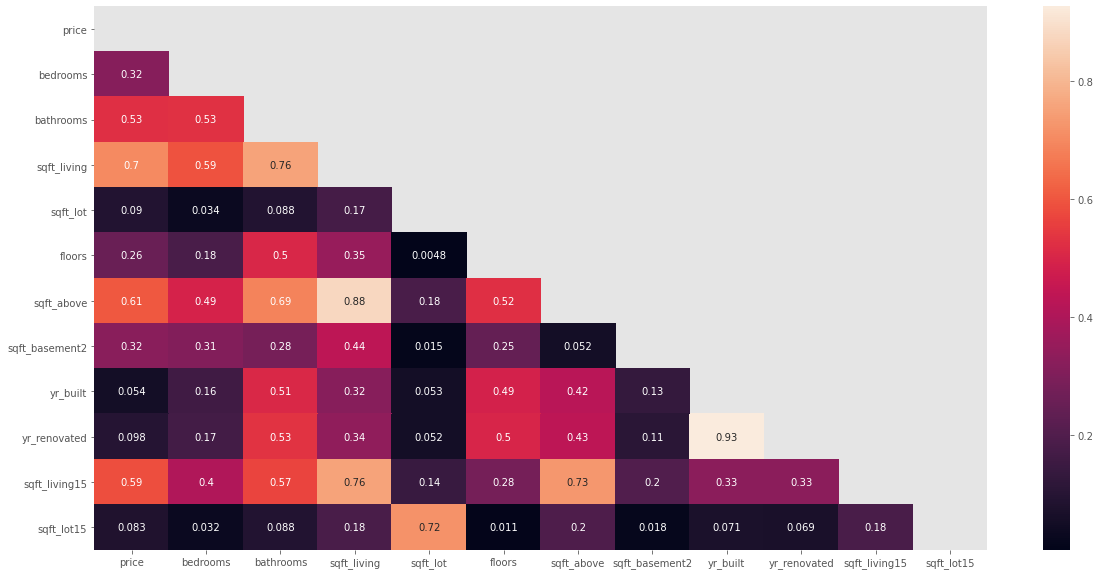

In [46]:
#Explore the co-linearity of x variables
mask = np.triu(np.ones_like(df_numeric.corr(), dtype=bool))

plt.figure(figsize=(20,10))

cor = df_numeric.corr().abs()
sns.heatmap(cor, mask=mask, annot=True);

Variable relationships with > .70 correlation, we will include just the columns from these combinations that have the stronger correlation with Price
- sqft_above - sqft_living (drop `'sqft_above'`)
- bathrooms - sqft_living (drop `'bathrooms'`)
- yr_built - yr_renovated (drop `'yr_built'`)
- sqft_living - sqft_living15 (drop `'sqft_living15'`)
- sqft_lot - sqft_lot15 (drop `'sqft_lot15'`)


In [77]:
#Create a df containing our numeric columns with co-linear columns dropped
df_numeric_2 = df_numeric.drop(columns=['sqft_above','bathrooms','yr_built','sqft_living15','sqft_lot15'])

In [74]:
X_train_numeric_2 = X_train_numeric.drop(columns=['sqft_above','bathrooms','yr_built','sqft_living15','sqft_lot15'])
X_test_numeric_2 = X_test_numeric.drop(columns=['sqft_above','bathrooms','yr_built','sqft_living15','sqft_lot15'])
multi_model_2 = LinearRegression()
multi_model_2.fit(X_train_numeric_2,y_train)

LinearRegression()

In [76]:
#Print results compared to our previous models
print(f'Simple R2 {round(simple_model.rsquared,2)}')
print(f'multi_model_1 Train R2 {round(lr.score(X_train_numeric, y_train),2)}')
print(f'multi_model_1 Test R2 {round(lr.score(X_test_numeric, y_test),2)}')
print(f'multi_model_2 Train R2 {round(multi_model_2.score(X_train_numeric_2, y_train),2)}')
print(f'multi_model_2 Test R2 {round(multi_model_2.score(X_test_numeric_2, y_test),2)}')

Simple R2 0.49
multi_model_1 Train R2 0.57
multi_model_1 Test R2 0.56
multi_model_2 Train R2 0.54
multi_model_2 Test R2 0.53
